1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [79]:
import pandas as pd 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 

In [90]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
X = df.drop("variety", 1)
y = df["variety"]

In [12]:
y = np.array(y)
X = np.array(X)

In [13]:
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model1 = KNeighborsClassifier(n_neighbors=3)
model2 = KNeighborsClassifier(n_neighbors=7)


In [17]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
predict1 = np.array([[15.7,2.8,9.5,0.1]])
predict1.reshape(-1, 1)
predict1

array([[15.7,  2.8,  9.5,  0.1]])

In [35]:
predict2 = np.array([[1.7,3.8,4.5,11.3]])
predict2.reshape(-1, 1)
predict2.shape

(1, 4)

In [73]:
print("Planta [15.7,2.8,9.5,0.1] con el modelo k=3: ", model1.predict(predict1))
print("Planta [15.7,2.8,9.5,0.1] con el modelo k=7: ", model2.predict(predict1))
print("Planta [1.7,3.8,4.5,11.3] con el modelo k=3: ", model1.predict(predict2))
print("Planta [1.7,3.8,4.5,11.3] con el modelo k=7: ", model2.predict(predict2))

Planta [15.7,2.8,9.5,0.1] con el modelo k=3:  ['Virginica']
Planta [15.7,2.8,9.5,0.1] con el modelo k=7:  ['Virginica']
Planta [1.7,3.8,4.5,11.3] con el modelo k=3:  ['Virginica']
Planta [1.7,3.8,4.5,11.3] con el modelo k=7:  ['Virginica']


In [67]:
print("Score para k=3: ", model1.score(X_test, y_test))
print("Score para k=7: ", model2.score(X_test, y_test))

Score para k=3:  1.0
Score para k=7:  0.9666666666666667


# Cambiando parametros

Score para k = 1 ------> 0.9666666666666667
Score para k = 2 ------> 0.9333333333333333
Score para k = 3 ------> 1.0
Score para k = 4 ------> 0.9333333333333333
Score para k = 5 ------> 1.0
Score para k = 6 ------> 1.0
Score para k = 7 ------> 0.9666666666666667
Score para k = 8 ------> 0.9666666666666667
Score para k = 9 ------> 0.9333333333333333
Score para k = 10 ------> 0.9
Score para k = 11 ------> 1.0
Score para k = 12 ------> 1.0
Score para k = 13 ------> 1.0
Score para k = 14 ------> 1.0
Score para k = 15 ------> 0.9666666666666667
Score para k = 16 ------> 0.9666666666666667
Score para k = 17 ------> 1.0
Score para k = 18 ------> 0.9666666666666667
Score para k = 19 ------> 0.9666666666666667
Score para k = 20 ------> 0.9666666666666667


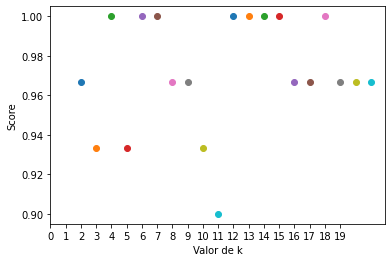

In [89]:
i = 1
while i <= 20:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    model_while = KNeighborsClassifier(n_neighbors=i)
    model_while.fit(X_train, y_train)
    print("Score para k =",i, "------>", model1.score(X_test, y_test))


    i += 1
    plt.scatter(i, model1.score(X_test, y_test))
    plt.xticks(range(20))
    plt.ylabel("Score")
    plt.xlabel("Valor de k")

In [78]:
i = 1
while i <= 20:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
    model_while = KNeighborsClassifier(n_neighbors=i)
    model_while.fit(X_train, y_train)
    print("Score para k =",i, "------>", model1.score(X_test, y_test))


    i += 1

Score para k = 1 ------> 0.9666666666666667
Score para k = 2 ------> 0.9777777777777777
Score para k = 3 ------> 0.9777777777777777
Score para k = 4 ------> 0.9777777777777777
Score para k = 5 ------> 0.9444444444444444
Score para k = 6 ------> 0.9666666666666667
Score para k = 7 ------> 0.9666666666666667
Score para k = 8 ------> 0.9555555555555556
Score para k = 9 ------> 0.9666666666666667
Score para k = 10 ------> 0.9555555555555556
Score para k = 11 ------> 0.9555555555555556
Score para k = 12 ------> 0.9888888888888889
Score para k = 13 ------> 0.9555555555555556
Score para k = 14 ------> 1.0
Score para k = 15 ------> 0.9777777777777777
Score para k = 16 ------> 1.0
Score para k = 17 ------> 0.9555555555555556
Score para k = 18 ------> 0.9555555555555556
Score para k = 19 ------> 0.9555555555555556
Score para k = 20 ------> 0.9666666666666667
